<a href="https://www.kaggle.com/code/navyyah/customer-churn-prediction-using-ml-99-accuracy?scriptVersionId=268735696" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# **Loading the dataset**

In [2]:
data=pd.read_csv('/kaggle/input/ecommerce-churn-data-for-churn-prediction-models/ecommerce_churn_data.csv')
data.sample(2)

,CustomerID,Age,Gender,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,HoursSpentOnApp,NumberOfDevicesRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
9755,9757,48,Female,70.0,Mobile,3,8.5,3.8,4,5,4,0,30,1,300.0,0
3142,3144,22,Female,2.0,Mobile,2,5.0,4.8,4,1,1,0,3,1,25.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10205 entries, 0 to 10204
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 10205 non-null  int64  
 1   Age                        10205 non-null  int64  
 2   Gender                     10205 non-null  object 
 3   Tenure                     10204 non-null  float64
 4   PreferredLoginDevice       10205 non-null  object 
 5   CityTier                   10205 non-null  int64  
 6   WarehouseToHome            10205 non-null  float64
 7   HoursSpentOnApp            10205 non-null  float64
 8   NumberOfDevicesRegistered  10205 non-null  int64  
 9   SatisfactionScore          10205 non-null  int64  
 10  NumberOfAddress            10205 non-null  int64  
 11  Complain                   10205 non-null  int64  
 12  OrderCount                 10205 non-null  int64  
 13  DaySinceLastOrder          10205 non-null  int

In [4]:
data.describe()

,CustomerID,Age,Tenure,CityTier,WarehouseToHome,HoursSpentOnApp,NumberOfDevicesRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
count,10205.000000,10205.000000,10204.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000
mean,29677.581872,35.193043,19.685515,2.007349,9.887428,3.343626,2.833807,3.504459,1.861832,0.216267,21.453895,8.891720,157.953214,0.238707
std,25617.824693,9.625432,14.475853,0.826741,5.481747,1.133353,0.921249,1.162892,0.920454,0.411718,18.955878,8.283807,107.627670,0.426314
min,307.000000,18.000000,1.000000,1.000000,0.500000,0.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5097.000000,28.000000,8.000000,1.000000,6.000000,2.500000,2.000000,3.000000,1.000000,0.000000,9.000000,3.000000,75.000000,0.000000
50%,9711.000000,33.000000,16.000000,2.000000,9.000000,3.400000,3.000000,4.000000,2.000000,0.000000,18.000000,6.000000,140.000000,0.000000
75%,56429.000000,42.000000,28.000000,3.000000,13.000000,4.100000,3.000000,4.000000,2.000000,0.000000,28.000000,12.000000,220.000000,0.000000
max,56760.000000,65.000000,85.000000,3.000000,35.000000,8.500000,5.000000,5.000000,5.000000,1.000000,250.000000,60.000000,1120.000000,1.000000


In [5]:
data.isna().sum()

CustomerID                   0
Age                          0
Gender                       0
Tenure                       1
PreferredLoginDevice         0
CityTier                     0
WarehouseToHome              0
HoursSpentOnApp              0
NumberOfDevicesRegistered    0
SatisfactionScore            0
NumberOfAddress              0
Complain                     0
OrderCount                   0
DaySinceLastOrder            0
CashbackAmount               0
Churn                        0
dtype: int64

In [6]:
data.duplicated().sum()

0

# **Exploratory Data Analysis**

In [7]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'HoursSpentOnApp',
       'NumberOfDevicesRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [8]:
num_cols=['Age','Tenure','WarehouseToHome','HoursSpentOnApp','NumberOfDevicesRegistered','NumberOfAddress','OrderCount','DaySinceLastOrder','CashbackAmount']
cat_cols=['Gender','PreferredLoginDevice','CityTier','SatisfactionScore','Complain','Churn']

**Distribution of Numerical columns**

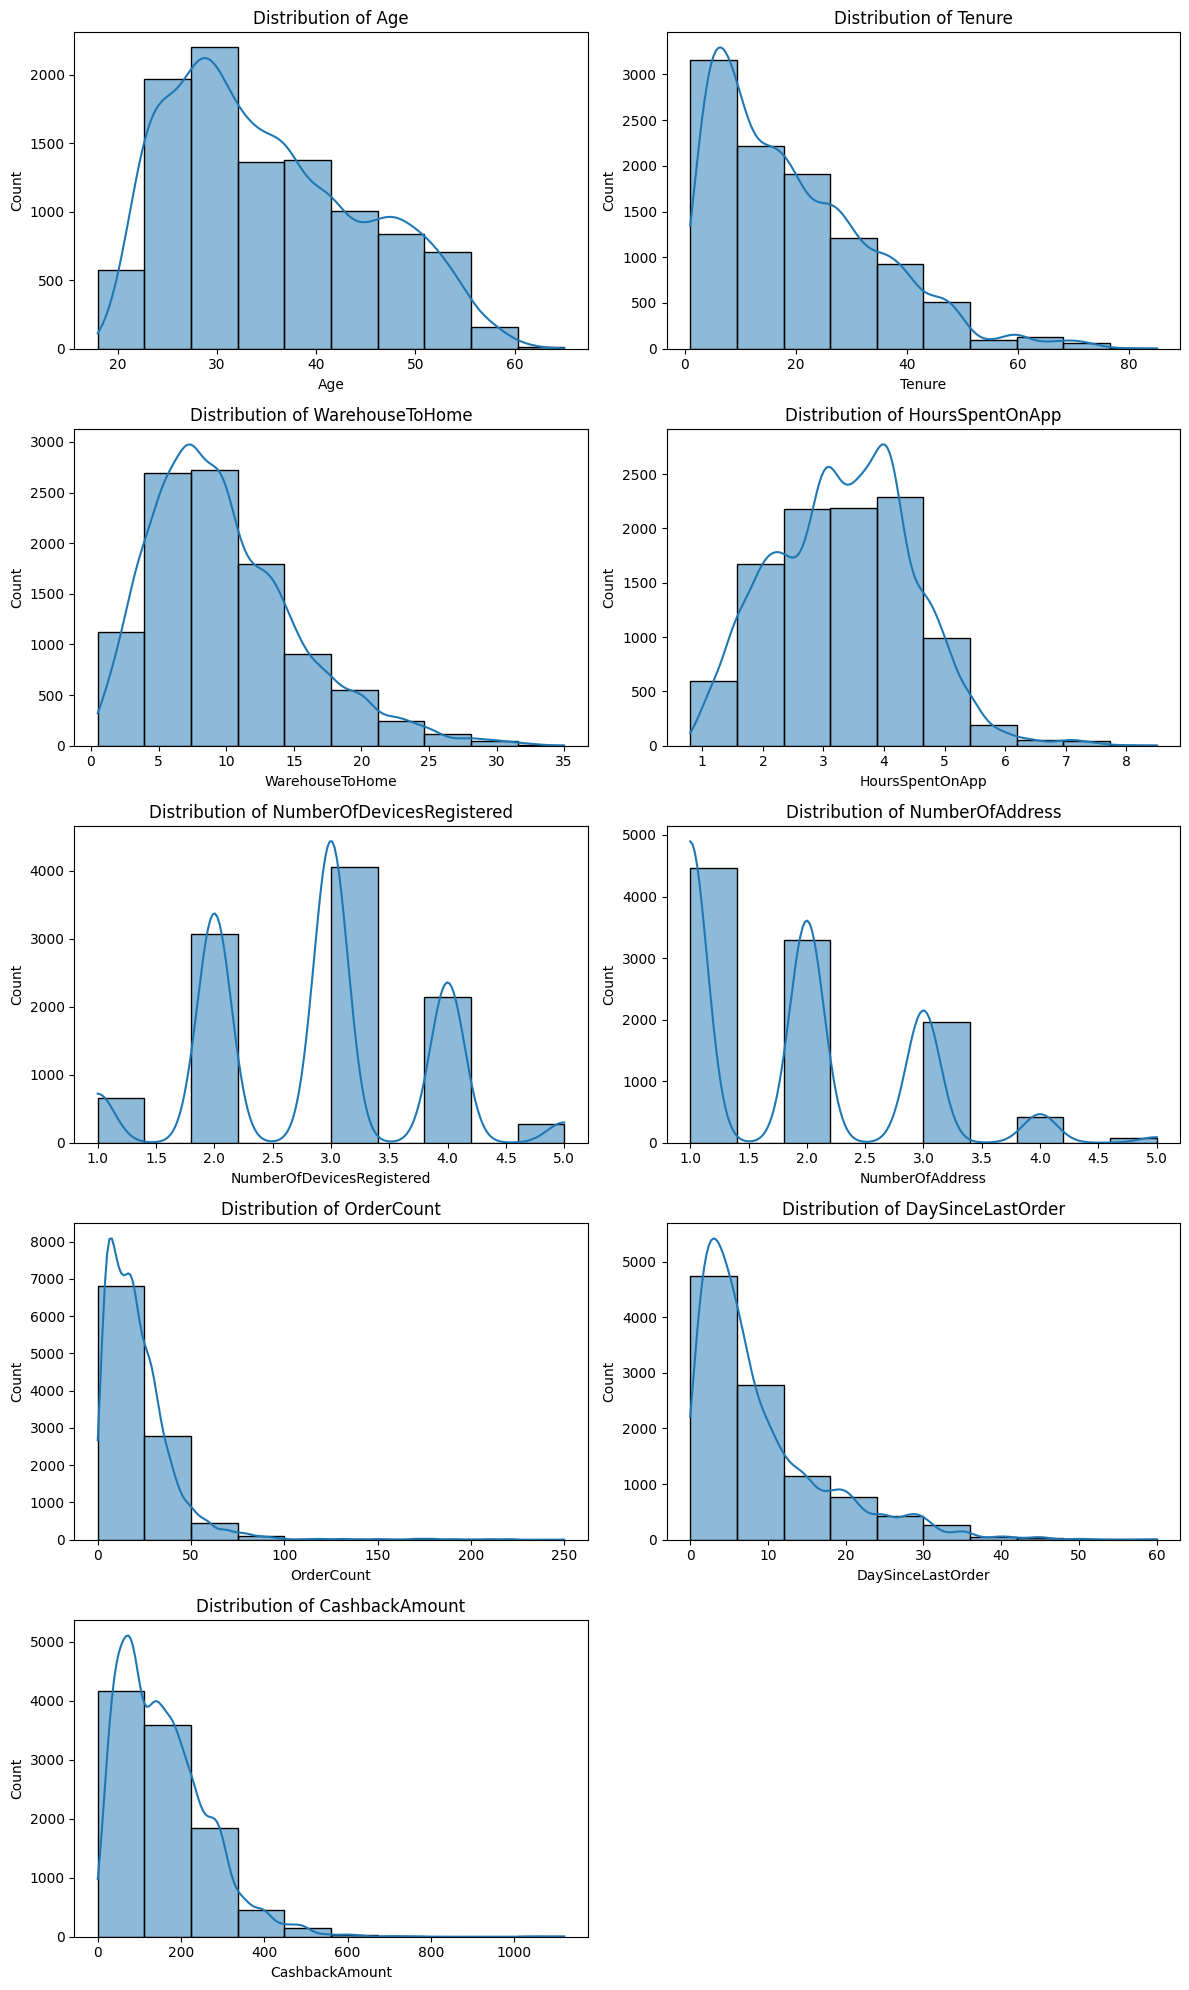

In [9]:
no_of_plots=2
no_of_rows=(len(num_cols)+1)//no_of_plots

plt.figure(figsize=(12,4*no_of_rows))

for i,col in enumerate(num_cols):
    subplot_index=i+1
    plt.subplot(no_of_rows,no_of_plots,subplot_index)
    sns.histplot(data[col],bins=10,kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Distribution of categorical columns**

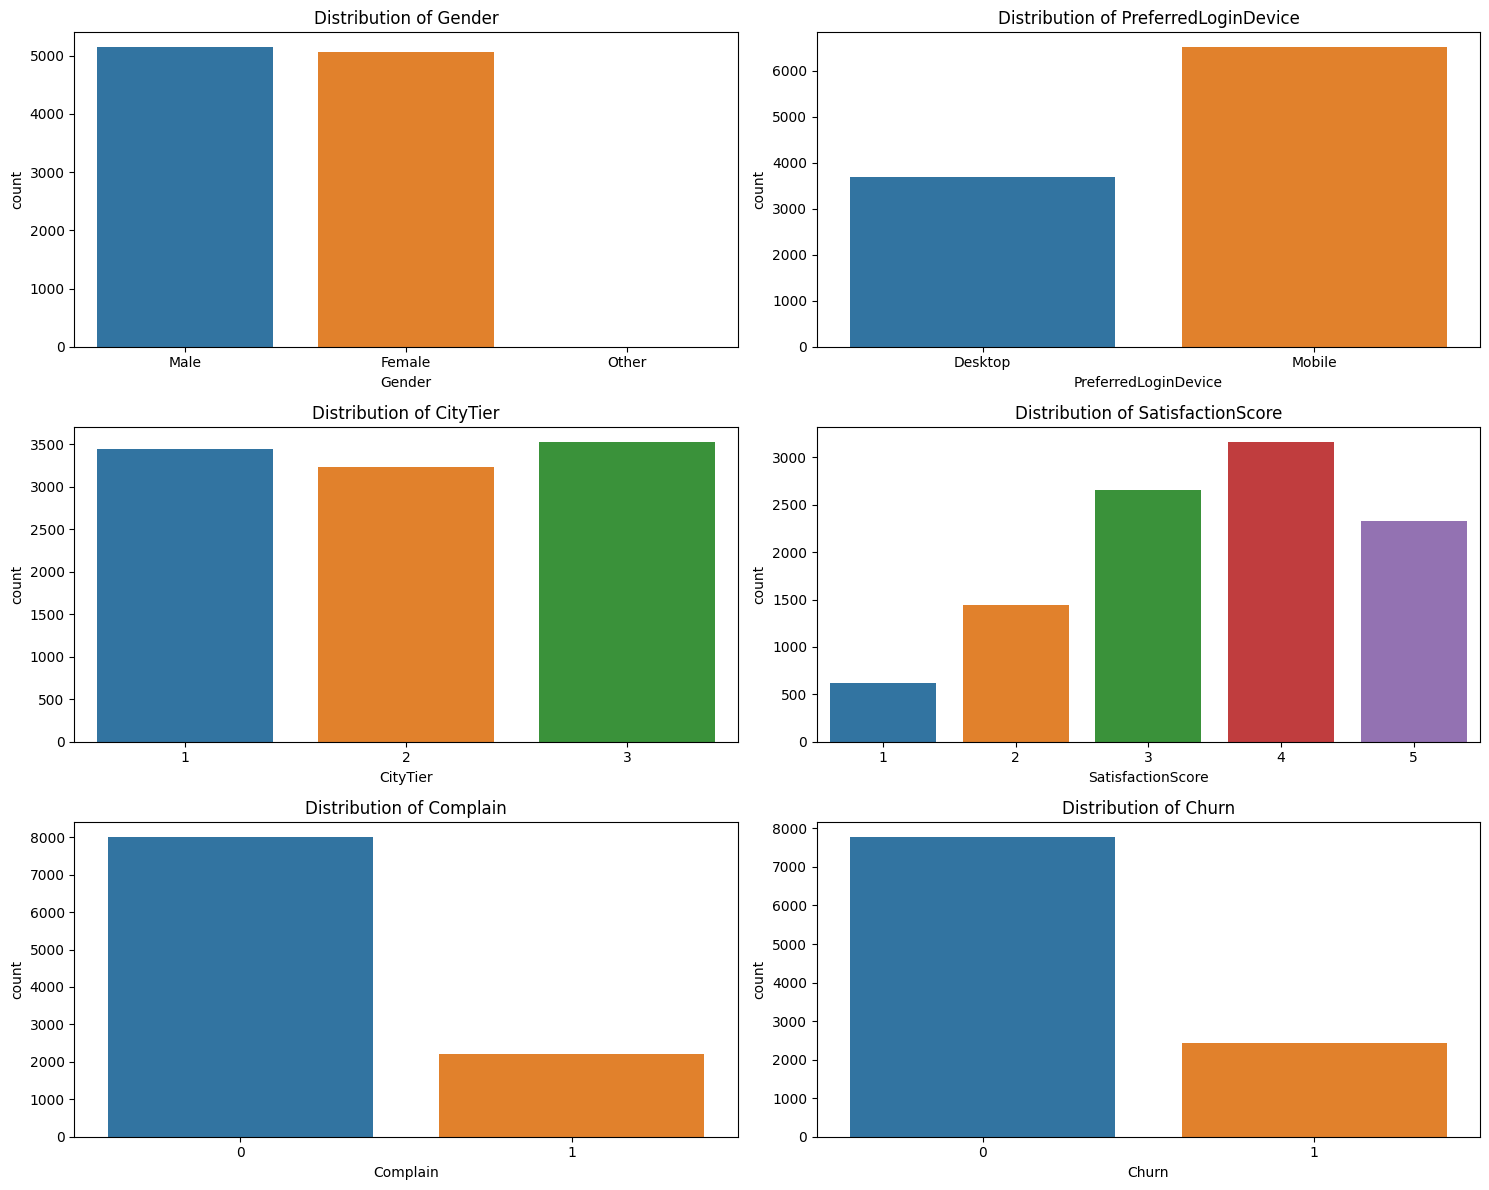

In [10]:
no_of_plots=2
no_of_rows=(len(cat_cols)+1)//no_of_plots

plt.figure(figsize=(15,4*no_of_rows))

for i,col in enumerate(cat_cols):
    subplot_index=i+1
    plt.subplot(no_of_rows,no_of_plots,subplot_index)
    sns.countplot(data=data,x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Relation btw Age and Churn**

<Axes: xlabel='Churn', ylabel='Age'>

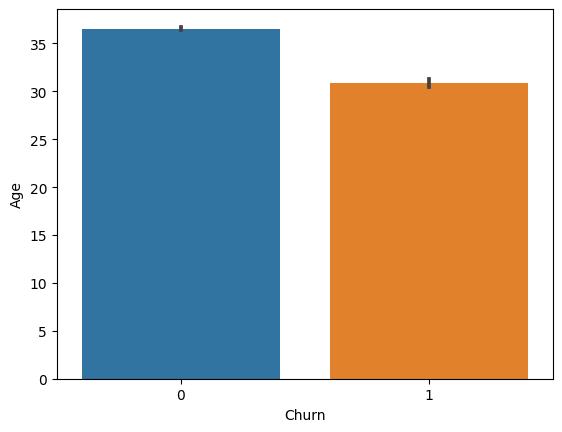

In [11]:
sns.barplot(data=data,x='Churn',y='Age')

**Relation btw Tenure and Churn**

<Axes: xlabel='Churn', ylabel='Tenure'>

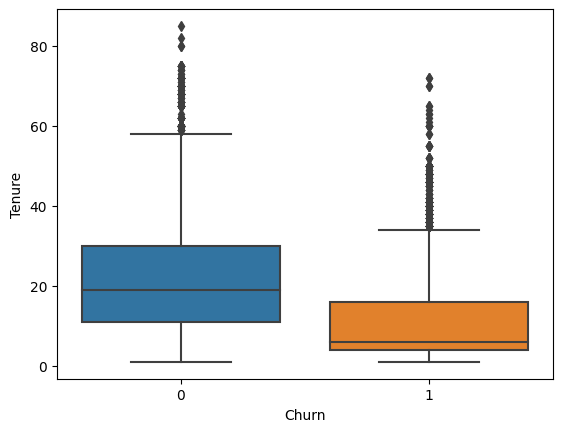

In [12]:
sns.boxplot(data=data,x='Churn',y='Tenure')

**Heatmap of Churn and satisfactionScore**

<Axes: xlabel='SatisfactionScore', ylabel='Churn'>

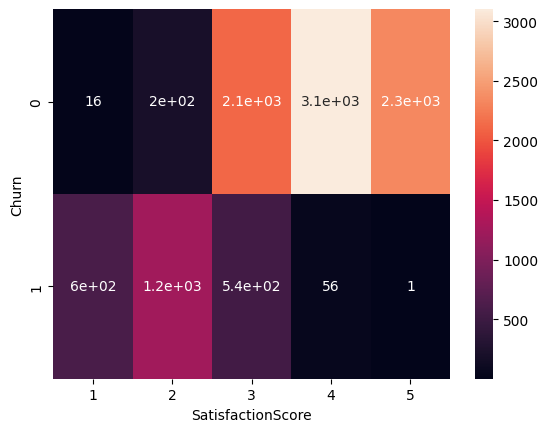

In [13]:
crosstab=pd.crosstab(data['Churn'],data['SatisfactionScore'])
sns.heatmap(crosstab,annot=True)

# **Handling Missing Values**

In [14]:
data=data.dropna(subset='Tenure')

In [15]:
data.isna().sum()

CustomerID                   0
Age                          0
Gender                       0
Tenure                       0
PreferredLoginDevice         0
CityTier                     0
WarehouseToHome              0
HoursSpentOnApp              0
NumberOfDevicesRegistered    0
SatisfactionScore            0
NumberOfAddress              0
Complain                     0
OrderCount                   0
DaySinceLastOrder            0
CashbackAmount               0
Churn                        0
dtype: int64

# **Encoding Categorical Variables**

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('Churn',axis=1),data['Churn'],test_size=0.3,random_state=42)

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,drop='first')
ohe.fit(X_train[['Gender','PreferredLoginDevice']])
encoded_data_train=ohe.transform(X_train[['Gender','PreferredLoginDevice']])
encoded_data_test=ohe.transform(X_test[['Gender','PreferredLoginDevice']])

In [18]:
encoded_data_train=pd.DataFrame(encoded_data_train,columns=ohe.get_feature_names_out(['Gender','PreferredLoginDevice']))
encoded_data_test=pd.DataFrame(encoded_data_test,columns=ohe.get_feature_names_out(['Gender','PreferredLoginDevice']))

In [19]:
X_train=pd.concat([X_train.reset_index(drop=True),encoded_data_train],axis=1)
X_test=pd.concat([X_test.reset_index(drop=True),encoded_data_test],axis=1)

In [20]:
X_train.drop(['Gender','PreferredLoginDevice'],axis=1,inplace=True)
X_test.drop(['Gender','PreferredLoginDevice'],axis=1,inplace=True)

In [21]:
X_train.drop('CustomerID',axis=1,inplace=True)
X_test.drop('CustomerID',axis=1,inplace=True)

# **Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_ss=ss.transform(X_train)
X_test_ss=ss.transform(X_test)

In [23]:
X_train=pd.DataFrame(X_train_ss,columns=X_train.columns)
X_test=pd.DataFrame(X_test_ss,columns=X_test.columns)

# **Choosing the best model**

In [24]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
models = {
    'lr':LogisticRegression(),
    'rf':RandomForestClassifier(random_state=42),
    'gb':GradientBoostingClassifier(random_state=42),
    'dt':DecisionTreeClassifier(random_state=42)
}

skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_results=[]
for name,model in models.items():
    score=cross_val_score(model,X_train,y_train,cv=skf,scoring='accuracy')
    cv_results.append(
        {
            'name':name,
            'avg_acc_score':score.mean()
        }
    )
cv_results=pd.DataFrame(cv_results).sort_values(by='avg_acc_score',ascending=False)

In [25]:
cv_results

,name,avg_acc_score
1,rf,0.995520
3,dt,0.992999
2,gb,0.992160
0,lr,0.982078


# **Prediction**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9983670803396473
